<a href="https://colab.research.google.com/github/VickyYu7/SP_Cryptocurrencies_Columbia/blob/main/Volatility_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir_path = "/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/"
filelist =[]
for file in os.listdir(dir_path):
    if file.endswith("_v2.csv"):
        filelist.append(dir_path + file)
filelist

['/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/4.s&p_twitter_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/10.news_senti_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/8.CBDC_atten_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/8.CBDC_uncertainty_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/fear&greed_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/tweets_pos_sentiment_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/tweets_neg_sentiment_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/twitter_btccrash_pos_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/twitter_btccrash_neg_v2.csv']

In [ ]:
senti = filelist[4]
df_st = pd.read_csv(senti)
indexname = senti[64:-7]
df_st.columns = ['date',indexname]
df_st[indexname+'_return'] = df_st[indexname].pct_change()
df_st[indexname+'_vol'] = df_st[indexname].pct_change().rolling(30).std()#*(100**0.5)
df_st[indexname+'_rv'] = df_st[indexname+'_vol'].pct_change()
df_st.set_index('date', inplace=True)
df_st

,fear&greed,fear&greed_return,fear&greed_vol,fear&greed_rv
date,,,,
2023-02-07,54,NaN,NaN,NaN
2023-02-06,56,0.037037,NaN,NaN
2023-02-05,58,0.035714,NaN,NaN
2023-02-04,58,0.000000,NaN,NaN
2023-02-03,60,0.034483,NaN,NaN
...,...,...,...,...
2018-02-05,11,0.375000,0.303529,0.025647
2018-02-04,24,1.181818,0.356552,0.174688
2018-02-03,40,0.666667,0.374121,0.049272


<Axes: xlabel='date'>

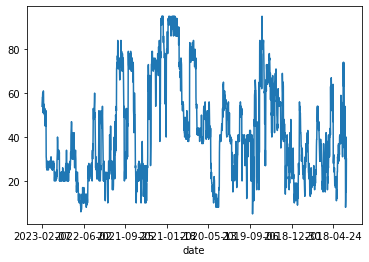

In [ ]:
df_st['fear&greed'].plot()

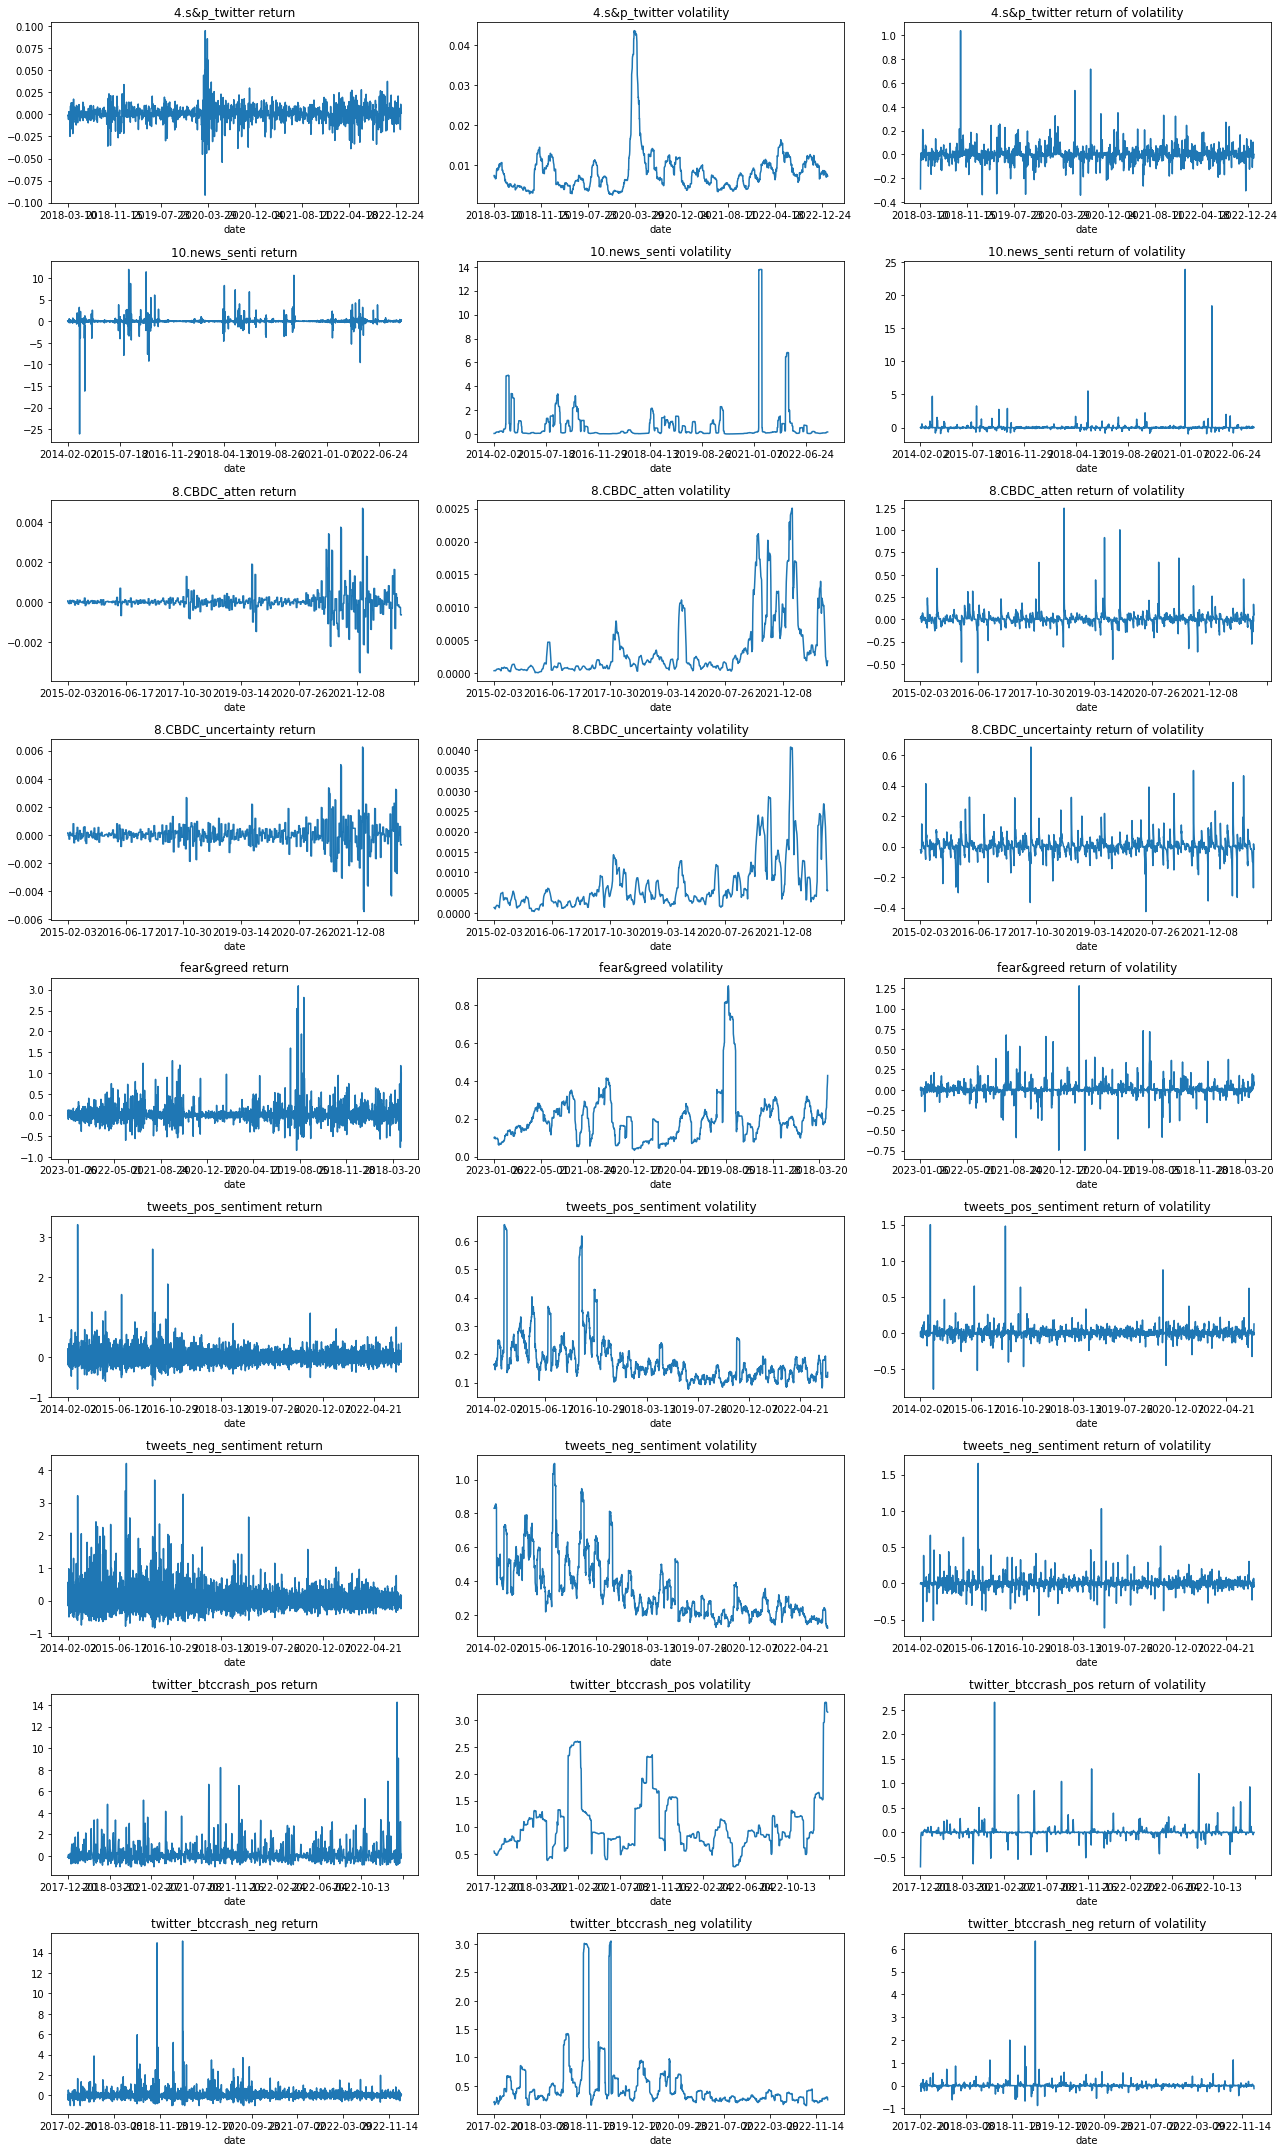

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt     

COL_NUM = 3
ROW_NUM = 9

fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(18,30))

for i in range(9):
  senti = filelist[i]
  df_st = pd.read_csv(senti)
  indexname = senti[64:-7]
  df_st.columns = ['date',indexname]
  df_st[indexname+'_return'] = df_st[indexname].pct_change()
  df_st = df_st[df_st[indexname+'_return']<20]
  df_st[indexname+'_vol'] = df_st[indexname].pct_change().rolling(30).std()#*(100**0.5)
  df_st = df_st[df_st[indexname+'_vol']<50]
  df_st[indexname+'_rv'] = df_st[indexname+'_vol'].pct_change()
  df_st = df_st[df_st[indexname+'_rv']<50]
  df_st.set_index('date', inplace=True)
  
  ax = axes[i, 0]
  df_st[indexname+'_return'].plot(ax=ax)
  ax.set_title(indexname+" return")

  ax = axes[i, 1]
  df_st[indexname+'_vol'].plot(ax=ax)
  ax.set_title(indexname+" volatility")

  ax = axes[i, 2]
  df_st[indexname+'_rv'].plot(ax=ax)
  ax.set_title(indexname+" return of volatility")

plt.tight_layout()

In [ ]:
dir_path = "/content/drive/MyDrive/S&P Crypto Project/Crypto Data/"
coinlist =[]
for file in os.listdir(dir_path):
    if file.endswith("_v2.csv")and "binance" not in file and "uniswap" not in file and "chainlink" not in file:
        coinlist.append(dir_path + file)
coinlist

['/content/drive/MyDrive/S&P Crypto Project/Crypto Data/bitcoin_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Crypto Data/ether_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Crypto Data/SP_BDM_exlarge_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Crypto Data/SP_BDM_v2.csv']

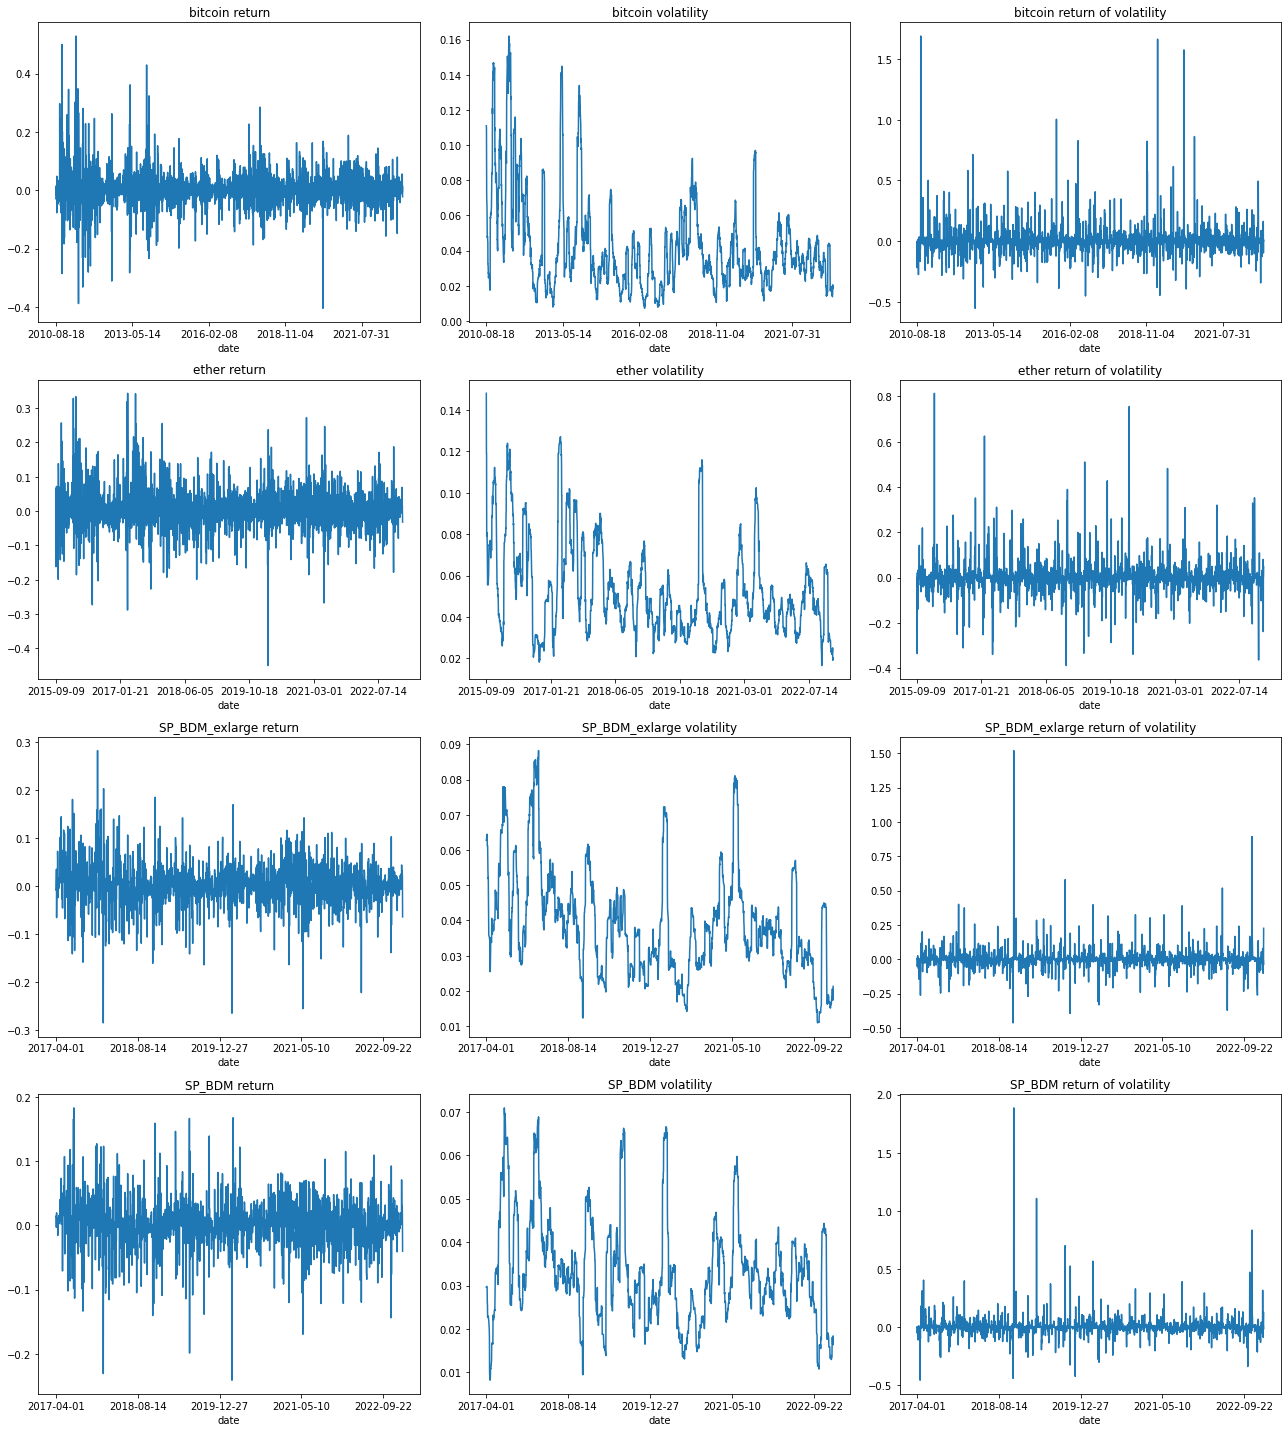

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt     

COL_NUM = 3
ROW_NUM = 4

fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(18,20))

for i in range(4):
  coin = coinlist[i]
  df_st = pd.read_csv(coin)
  coinname = coin[54:-7]
  df_st.columns = ['date',coinname]
  df_st[coinname+'_return'] = df_st[coinname].pct_change()
  df_st = df_st[df_st[coinname+'_return']<20]
  df_st[coinname+'_vol'] = df_st[coinname].pct_change().rolling(30).std()#*(100**0.5)
  df_st = df_st[df_st[coinname+'_vol']<50]
  df_st[coinname+'_rv'] = df_st[coinname+'_vol'].pct_change()
  df_st = df_st[df_st[coinname+'_rv']<50]
  df_st.set_index('date', inplace=True)
  
  ax = axes[i, 0]
  df_st[coinname+'_return'].plot(ax=ax)
  ax.set_title(coinname+" return")

  ax = axes[i, 1]
  df_st[coinname+'_vol'].plot(ax=ax)
  ax.set_title(coinname+" volatility")

  ax = axes[i, 2]
  df_st[coinname+'_rv'].plot(ax=ax)
  ax.set_title(coinname+" return of volatility")

plt.tight_layout()